## Diseases and spreading :/

The SIR model is one of the simplest compartmental models, and many models are derivations of this basic form. The model consists of three compartments– S for the number susceptible, I for the number of infectious, and R for the number recovered (or immune). This model is reasonably predictive for infectious diseases which are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella.

![](images/sir-s.svg)
![](images/sir-i.svg)
![](images/sir-r.svg)

for more info on network diffusion models in python checkout - NDlib - Network Diffusion Library

https://github.com/GiulioRossetti/ndlib

In [47]:
import networkx as nx
import ndlib.models.epidemics.SIRModel as sir
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

In [48]:
# Network Definition
G = nx.erdos_renyi_graph(400, 0.3)

# Model Selection
model = sir.SIRModel(G)

In [49]:
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.1)
model.set_initial_status(config)

In [50]:
# Simulation
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

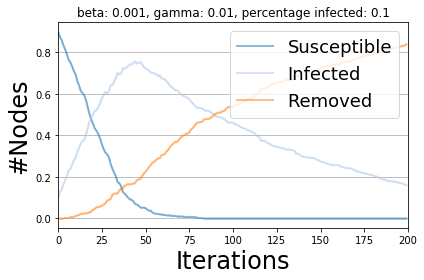

In [51]:
viz = DiffusionTrend(model, trends)
p = viz.plot()

What happens if we change the structure of this network?

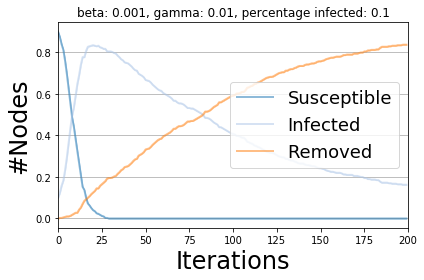

In [56]:
G = nx.erdos_renyi_graph(400, 0.7)
model = sir.SIRModel(G)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.1)
model.set_initial_status(config)
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
p = viz.plot()

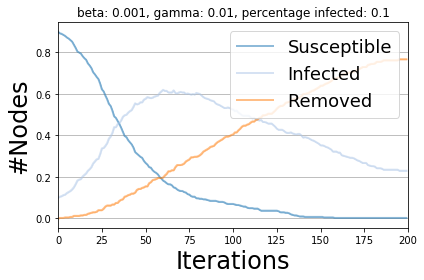

In [75]:
G = nx.barabasi_albert_graph(400, 40)
model = sir.SIRModel(G)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.1)
model.set_initial_status(config)
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
p = viz.plot()

Does this also hold true for various other diffusion processes like computer viruses?

Sure! why not?

#### Excercise

Let's take a dataset of autonomous systems, i.e to-be future IoT networks.

The graph of routers comprising the Internet can be organized into sub-graphs called Autonomous Systems (AS). Each AS exchanges traffic flows with some neighbors (peers). We can construct a communication network of who-talks-to- whom from the BGP (Border Gateway Protocol) logs.

source: http://snap.stanford.edu/data/as.html

Create the a graph and run SIR model on the graph and plot the diffusion trend curve. Play around with various parameters :)

Also look at the degree distribution of this network, what can we infer from this.

In [112]:
import pandas as pd
G = nx.Graph()
for row in pd.read_csv('autosys.txt', delimiter='\t').iterrows():
    G.add_edge(row[1][0], row[1][1])

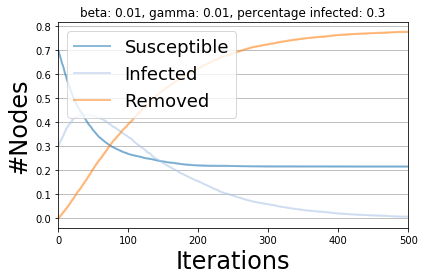

In [113]:
model = sir.SIRModel(G)
config = mc.Configuration()
config.add_model_parameter('beta', 0.01)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.3)
model.set_initial_status(config)
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
p = viz.plot()

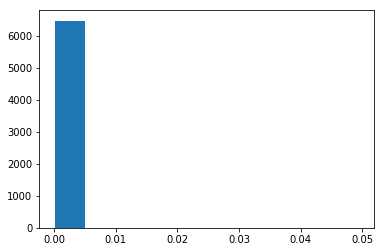

In [114]:
import matplotlib.pyplot as plt
plt.hist(list(nx.pagerank(G).values()))
plt.show()

In [115]:
sorted(dict(nx.degree(G)).values(), reverse=True)

[1459,
 752,
 693,
 401,
 377,
 286,
 252,
 226,
 180,
 175,
 142,
 140,
 133,
 132,
 130,
 128,
 112,
 111,
 109,
 104,
 94,
 89,
 87,
 81,
 81,
 76,
 73,
 73,
 69,
 69,
 66,
 64,
 63,
 61,
 60,
 57,
 56,
 56,
 55,
 55,
 54,
 54,
 52,
 52,
 52,
 51,
 51,
 49,
 49,
 48,
 47,
 46,
 46,
 45,
 45,
 45,
 44,
 43,
 41,
 41,
 41,
 40,
 38,
 38,
 37,
 37,
 37,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 33,
 33,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,